# Assignment 2
Consider a system of $N$ noninteracting, distinguishable particles each of which can be in single particle microstates with energy $0$ and $\epsilon$. The system is in equilibrium with a heat bath at temperature $T$. 
* Derive the temperature dependence of the probability that a given particle is in the ground state. Then do the same for the probability that the particle is in the excited state. Discuss the limiting behavior of the probabilities for low and high temperatures.
* Derive the temperature dependence of the mean energy $E(T)$ of the system and give a simple argument for its behavior.
* Derive the heat capacity $C(T)$ and describe its qualitative behavior. Give a physical argument why $C$ has a maximum and estimate the temperature at which the maximum occurs.


Import useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will  setup the main properties of the system in a way similar to the previous assignment

In [79]:
n_particles=1000 # number of molecules adsorbed
epsilon=1.0 # this is a real number that controls the scale of the energy. Whenever playing with toy models, it is a good idea to set to unity as many parameters as possible
kb=1.0 # here we will assume that the choice above for the energy scale is consistent with a unit value of the boltzmann constant
particle_states=np.array([0, 1]) # these are the states mentioned in the problem
n_particle_states=particle_states.size # the size attribute of a numpy array can be convenient

We will now sample random microstates and save their energies into a numpy array. We will use this energies to buil the partition function, which we will need to compute the average properties of the system.

In [80]:
n_samples=10000
microstate_energies=np.zeros(n_samples)
for i in np.arange(n_samples):
    microstate_energies[i]=np.sum(np.random.choice(particle_states,n_particles))

Let's see how the energies of randomly samples states are distributed

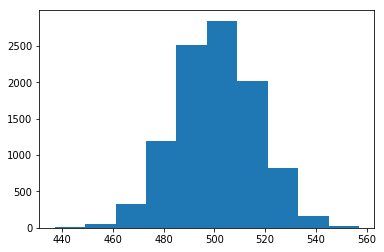

In [81]:
plt.hist(microstate_energies)
plt.show()

Given a temperature We can compute the Boltzmann factors for each state and weight them accordingly (note that, since our energy and kb units are arbitrary, also our temperature units are)

In [94]:
T=20
beta=1/kb/T
boltzmann_factors=np.exp(-beta*microstate_energies)
partition_function=np.sum(boltzmann_factors)
print(partition_function)

1.8857592001263877e-07


Let's look at how the probability of a microstate looks as a function of its energy. In order to get the probability we need to divide the boltzmann factor by the partition function

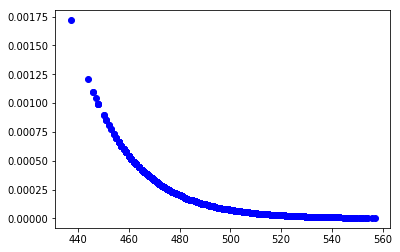

In [95]:
plt.plot(microstate_energies,boltzmann_factors/partition_function,'bo')
plt.show()

Are the probabilities above correct?

Given the probability of a microstate in the canonical ensemble, we can compute the average energy associated with the system at any given temperature

/opt/conda/anaconda3/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


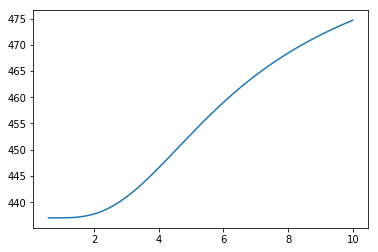

In [139]:
min_temperature=0.05
max_temperature=10
dt=0.001
temperatures=np.arange(min_temperature,max_temperature,dt)
n_temperatures=temperatures.size
system_energies=np.zeros(n_temperatures)
for i,T in enumerate(temperatures):
    beta=1/kb/T
    boltzmann_factors=np.exp(-beta*microstate_energies)
    partition_function=np.sum(boltzmann_factors)
    system_energies[i]=np.sum(microstate_energies*boltzmann_factors)/partition_function
plt.plot(temperatures,system_energies)
plt.show()

We can also compute the analytic result and compare the two to check how accurate the random sampling is

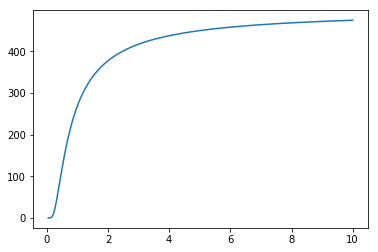

In [140]:
analytic_energies=n_particles/(1+np.exp(1/kb/temperatures))
plt.plot(temperatures,analytic_energies)
plt.show()

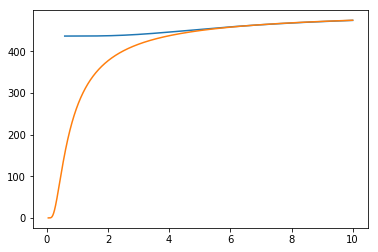

In [141]:
plt.plot(temperatures,system_energies)
plt.plot(temperatures,analytic_energies)
plt.show()

We can compute the derivative of the above plots numerically (using so-called finite differences) and obtain the heat capacity of the system as a function of temperature

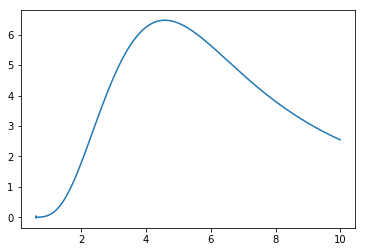

In [142]:
C_sampling=np.zeros(n_temperatures)
C_sampling[0]=(system_energies[1]-system_energies[0])/dt # this is really the basic definition of derivative, assuming dt -->0
C_sampling[1:n_temperatures-1]=(system_energies[2:n_temperatures]-system_energies[0:n_temperatures-2])/2/dt
C_sampling[-1]=(system_energies[-1]-system_energies[-2])/dt # the index -1 refers to the last entry of the array
plt.plot(temperatures,C_sampling)
plt.show()

We can compare the sampling results with the analytic derivative of the energy wrt temperature

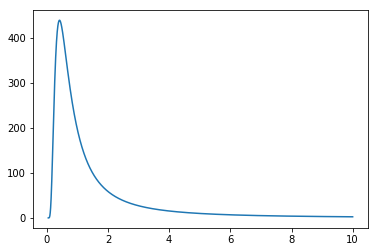

In [143]:
C_analytic=n_particles/(1+np.exp(1/kb/temperatures))**2*np.exp(1/kb/temperatures)/kb/temperatures**2
plt.plot(temperatures,C_analytic)
plt.show()

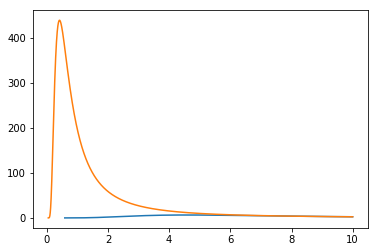

In [144]:
plt.plot(temperatures,C_sampling)
plt.plot(temperatures,C_analytic)
plt.show()